### HOMEWORK 2

First, we import all the libraries needed along with the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
data = load_boston() #loading the data into a dictionary
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
X = pd.DataFrame(data = data.data, columns = data.feature_names) #dataset with all the features
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#checking the shape:
X.shape

(506, 13)

In [5]:
#we now add the target label to our dataframe
y = pd.Series(data.target)

In [6]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

###### Now that our data is loaded, we will perform some Exploratory Data Analysis

In [7]:
#First we will explore the various data types, and we discover that all features are float (or are continuous)
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [8]:
#Now we will use df.describe to see the the distribution of the data
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


###### Findings by describing:
1. We have 506 entries for each of the labels and features
2. Features like TAX and B are in a very different scale than the rest of the features

In [9]:
#Let us now find and deal with null and/or duplicate values
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
X[X.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


###### Findings:
1. There are no null (Nan) values
2. There are no duplicates

In [11]:
corr_df = X.corr()
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [12]:
import seaborn as sns

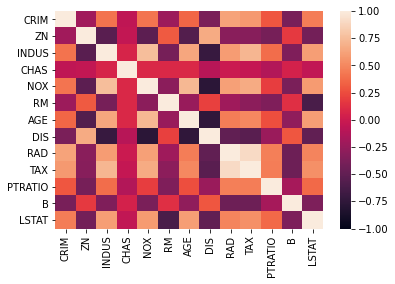

In [13]:
heat_map = sns.heatmap(corr_df, vmin = -1, vmax = 1)

##### Findings through the correlation map:
1. DIS is closely inversely related to 3 features, so we can drop DIS

In [14]:
X = X.drop(columns=['DIS'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33


In [15]:
#Rechecking the shape:
X.shape

(506, 12)

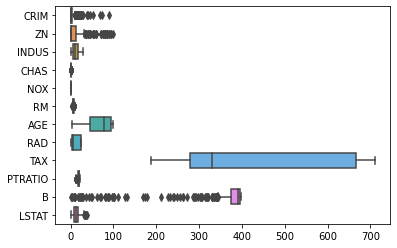

In [16]:
#Checking outliers and distribution: 
box_plot = sns.boxplot(data=X, orient="h")

In [17]:
feature_names = X.columns.values
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'], dtype=object)

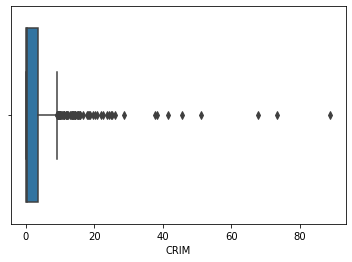

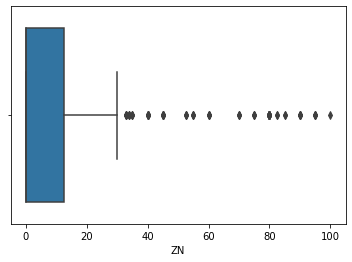

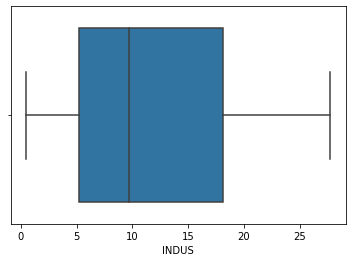

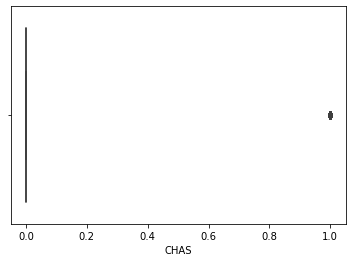

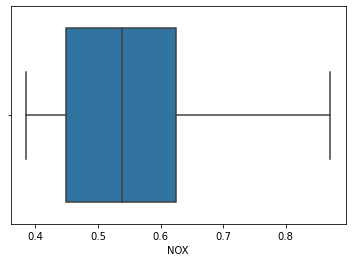

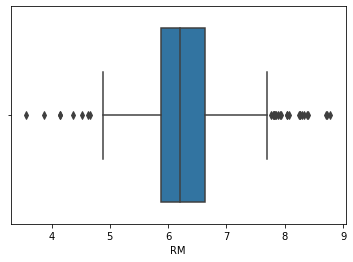

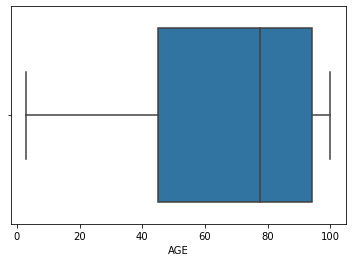

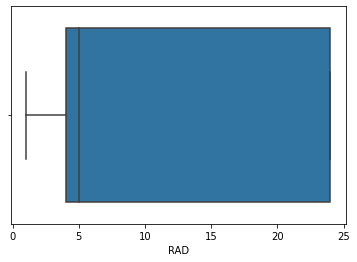

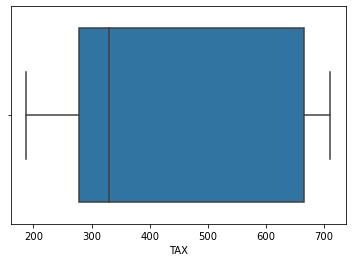

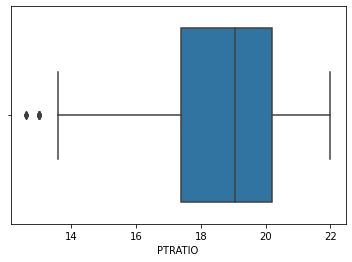

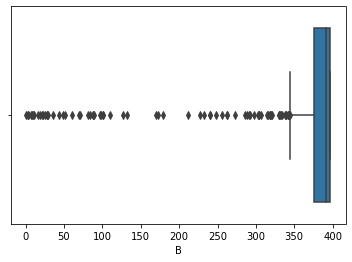

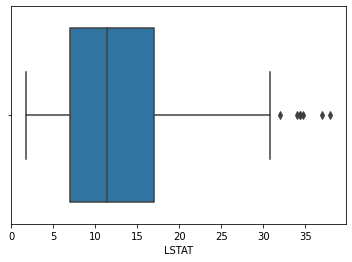

In [18]:
for feature in feature_names:
    plot = sns.boxplot(x=X[feature])
    plt.show()

#### Findings:
1. CRIM, B are distributed over a very small range
2. CHAS seems to be a categorical field
3. The scale of the features is different
4. SOme features are highly outlier-heavy

In [19]:
#seeing the unique values in CHAS
print(X['CHAS'].nunique())
print(X['CHAS'].unique())

2
[0. 1.]


#### Now we will scale our features
Since our data is in varied ranges and units, we will first normalize the data so it our features are comparable after we split the data into test and train to make sure that while fitting the scaler on a dataset, we don't pass info about our "unseen" test data downstream

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56) 
print(f'The shape of training set is {X_train.shape} and the shape of testing set is {X_test.shape}')

The shape of training set is (354, 12) and the shape of testing set is (152, 12)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[3.98271238e-03, 2.00000000e-01, 2.16735771e-01, ...,
        6.97674419e-01, 9.79197136e-01, 3.19716312e-01],
       [3.05054770e-04, 2.80000000e-01, 5.21296645e-01, ...,
        6.51162791e-01, 9.98562711e-01, 1.27092199e-01],
       [5.45902515e-03, 0.00000000e+00, 1.88088956e-01, ...,
        5.58139535e-01, 9.95814212e-01, 5.59716312e-01],
       ...,
       [1.34782119e-01, 0.00000000e+00, 6.36637769e-01, ...,
        8.83720930e-01, 8.51883605e-01, 8.01134752e-01],
       [3.22633160e-02, 0.00000000e+00, 6.36637769e-01, ...,
        8.83720930e-01, 9.34010792e-01, 3.29361702e-01],
       [9.09860192e-05, 3.50000000e-01, 1.16848850e-02, ...,
        3.37209302e-01, 9.94553432e-01, 1.06666667e-01]])

In [22]:
X_test = scaler.transform(X_test)
X_test

array([[9.23657426e-01, 0.00000000e+00, 6.36637769e-01, ...,
        8.83720930e-01, 9.69917797e-01, 6.02836879e-01],
       [6.81919133e-04, 0.00000000e+00, 4.37994723e-01, ...,
        7.09302326e-01, 9.73523627e-01, 3.00992908e-01],
       [1.40450317e-03, 0.00000000e+00, 4.04070863e-01, ...,
        9.76744186e-01, 9.91300620e-01, 1.34751773e-01],
       ...,
       [3.36253862e-03, 0.00000000e+00, 3.27553713e-01, ...,
        6.74418605e-01, 9.98789652e-01, 2.77163121e-01],
       [5.14771424e-04, 7.00000000e-01, 3.88239729e-02, ...,
        2.55813953e-01, 9.84769782e-01, 1.23120567e-01],
       [2.90298442e-03, 0.00000000e+00, 2.14851112e-01, ...,
        6.16279070e-01, 1.00000000e+00, 4.10496454e-01]])

#### We will now train our model using Multi-variate Linear Regression


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [24]:
#checking the weights
print(f'The wieghts are {model.coef_} \n and the bias is {model.intercept_}')

The wieghts are [ -1.60882051  -0.91711738   3.6380363    2.6206993   -5.51827104
  25.19514592   2.18877551   6.0012294   -5.93786723  -9.3315848
   4.35944813 -17.8873675 ] 
 and the bias is 16.633939618204334


In [25]:
y_predict = model.predict(X_test)

In [26]:
#Testing the coefficient of determination on our training set
model.score(X_train, y_train)

0.7329446326885074

In [27]:
#Testing the coefficient of determination on our testing set
model.score(X_test, y_test)

0.6510544101776684

In [28]:
#Seems like our model is not performing really well
#We will also calculate the root mean square error
from sklearn.metrics import mean_squared_error
print(f'RMSE is {mean_squared_error(y_test, y_predict, squared=False)}')

RMSE is 5.479904628603854


### We will now implement Ridge and Lasso Regression and see how it affects our model

In [29]:
from sklearn.linear_model import Ridge, Lasso

In [30]:
ridge_model_a = Ridge(alpha = 0.02)
ridge_model_a.fit(X_train, y_train)
print(f'Ridge model A coef: {ridge_model_a.coef_}')
print(f'Ridge Model A r2 score: {ridge_model_a.score(X_test, y_test)}')

Ridge model A coef: [ -1.61557033  -0.91214409   3.58632019   2.6244925   -5.49198391
  25.1080402    2.18529045   5.9700481   -5.89671206  -9.32030525
   4.35320632 -17.88542653]
Ridge Model A r2 score: 0.6513345663819448


In [31]:
ridge_model_b = Ridge(alpha = 0.5)
ridge_model_b.fit(X_train, y_train)
print(f'Ridge model B coef: {ridge_model_b.coef_}')
print(f'Ridge Model B r2 score: {ridge_model_b.score(X_test, y_test)}')

Ridge model B coef: [ -1.74194345  -0.78605995   2.53795572   2.69850249  -4.94515816
  23.25880061   2.0741548    5.3281735   -5.09384751  -9.06916089
   4.22470119 -17.73685581]
Ridge Model B r2 score: 0.6561899843478205


In [32]:
ridge_model_c = Ridge(alpha = 1)
ridge_model_c.fit(X_train, y_train)
print(f'Ridge model c coef: {ridge_model_c.coef_}')
print(f'Ridge Model c r2 score: {ridge_model_c.score(X_test, y_test)}')

Ridge model c coef: [ -1.81916968  -0.65102352   1.73355321   2.74981351  -4.50732771
  21.70570708   1.92603812   4.8126294   -4.52013835  -8.83872595
   4.12094568 -17.44839608]
Ridge Model c r2 score: 0.6585233071390793


In [33]:
ridge_model_f = Ridge(alpha = 2)
ridge_model_f.fit(X_train, y_train)
print(f'Ridge model f coef: {ridge_model_f.coef_}')
print(f'Ridge Model f r2 score: {ridge_model_f.score(X_test, y_test)}')

Ridge model f coef: [ -1.88034491  -0.39577687   0.63883785   2.80450453  -3.88568324
  19.31421189   1.60460072   4.04295517  -3.802809    -8.44119077
   3.96156314 -16.70491023]
Ridge Model f r2 score: 0.6584349782652197


In [34]:
ridge_model_d = Ridge(alpha = 10)
ridge_model_d.fit(X_train, y_train)
print(f'Ridge model d coef: {ridge_model_d.coef_}')
print(f'Ridge Model d r2 score: {ridge_model_d.score(X_test, y_test)}')

Ridge model d coef: [ -1.60106062   0.72487083  -1.73704892   2.59901319  -2.39951049
  11.09587105  -0.09037459   1.32287725  -2.54503877  -6.46063866
   3.22278117 -11.63817598]
Ridge Model d r2 score: 0.6048542293703295


In [35]:
ridge_model_e = Ridge(alpha = 50)
ridge_model_e.fit(X_train, y_train)
print(f'Ridge model e coef: {ridge_model_e.coef_}')
print(f'Ridge Model e r2 score: {ridge_model_e.score(X_test, y_test)}')

Ridge model e coef: [-0.91991721  1.21446142 -2.00913521  1.37250196 -1.69441252  3.99448887
 -1.33644693 -1.14081288 -2.1851919  -3.33291039  1.92060832 -4.96056438]
Ridge Model e r2 score: 0.42449187579822234


##### Findings:
Using Ridge Regression, we got slightly better values, and the most imrpoved for alpha = 1

In [36]:
lasso_model_a = Lasso(alpha = 0.001)
lasso_model_a.fit(X_train, y_train)

print(f'Lasso model a coef: {lasso_model_a.coef_}')
print(f'Lasso Model a r2 score: {lasso_model_a.score(X_test, y_test)}')

Lasso model a coef: [ -1.42149113  -0.90109247   3.50137389   2.62453717  -5.38740365
  25.17585687   2.15133875   5.84567124  -5.78906666  -9.26614828
   4.35094584 -17.8880813 ]
Lasso Model a r2 score: 0.6508223479932971


In [37]:
lasso_model_b = Lasso(alpha = 0.05)
lasso_model_b.fit(X_train, y_train)

print(f'Lasso model b coef: {lasso_model_b.coef_}')
print(f'Lasso Model b r2 score: {lasso_model_b.score(X_test, y_test)}')

Lasso model b coef: [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.49295514e+00
 -5.99067672e-01  2.43241943e+01  1.77075694e-02  2.94746847e-01
 -3.46487163e-01 -6.67043540e+00  3.51068046e+00 -1.70696468e+01]
Lasso Model b r2 score: 0.6418570589331594


In [38]:
lasso_model_c = Lasso(alpha = 0.1)
lasso_model_c.fit(X_train, y_train)

print(f'Lasso model c coef: {lasso_model_c.coef_}')
print(f'Lasso Model c r2 score: {lasso_model_c.score(X_test, y_test)}')

Lasso model c coef: [ -0.           0.          -0.           1.779555    -0.
  21.78739705   0.           0.          -0.45540476  -6.17300915
   2.82323367 -17.50121864]
Lasso Model c r2 score: 0.6390519874915241


In [39]:
lasso_model_d = Lasso(alpha = 10)
lasso_model_d.fit(X_train, y_train)

print(f'Lasso model d coef: {lasso_model_d.coef_}')
print(f'Lasso Model d r2 score: {lasso_model_d.score(X_test, y_test)}')

Lasso model d coef: [-0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.]
Lasso Model d r2 score: -0.005080374449762282


#### Findings:
Lasso regularization didn't improve results, with high lasso alpha value, the model performed worse 

### Seeing composite results for the best individual regularization model vs simple train test

In [40]:
#Simple Linear Model
print("Simple Train: ", model.score(X_train, y_train))
print("Simple Test: ", model.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso_model_a.score(X_train, y_train))
print("Lasso Test: ", lasso_model_a.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge_model_c.score(X_train, y_train))
print("Ridge Test: ", ridge_model_c.score(X_test, y_test))


Simple Train:  0.7329446326885074
Simple Test:  0.6510544101776684
*************************
Lasso Train:  0.732933804065447
Lasso Test:  0.6508223479932971
*************************
Ridge Train:  0.7292720761186158
Ridge Test:  0.6585233071390793


#### We can further optimize our model to deal with the outliers in features by either dropping them, but that might not work since we have a quite few outliers, or we can also replace with mid outlier values. We can also try dropping different features after exploring the relation between them. For the model and the training/testing sets we have, Ridge works best with alpha value of 1